<a href="https://colab.research.google.com/github/audyrtl/Project/blob/main/Data%20Analytics%20and%20Diagnostics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Shabina Retalia Audy

5026211103

Berikut merupakan code dari UAS ADD tentang saham dari PT. GRAB

## Import Library yang Dibutuhkan

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from google.colab import files

## Import dan Evaluasi Dataset

Hal ini berguna untuk memasukkan data dan melihat bagaimana bentuk dari data

In [ ]:
uploaded = files.upload()


Saving GRAB.csv to GRAB.csv


In [ ]:
#Lihat dataset
df = pd.read_csv('GRAB.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.630,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.290,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.520,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.100,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.060,8.32,8.85,8.85,25775900
...,...,...,...,...,...,...,...
502,2023-11-30,3.020,3.094,3.00,3.04,3.04,50506600
503,2023-12-01,3.040,3.120,3.04,3.07,3.07,23317000
504,2023-12-04,3.090,3.185,3.08,3.15,3.15,25401800
505,2023-12-05,3.120,3.165,3.10,3.14,3.14,18192800


In [ ]:
#Membuat Date menjadi index pada data
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [ ]:
#Lihat bentuk dari data
df.shape

(507, 6)

In [ ]:
#cek informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2021-12-01 to 2023-12-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       507 non-null    float64
 1   High       507 non-null    float64
 2   Low        507 non-null    float64
 3   Close      507 non-null    float64
 4   Adj Close  507 non-null    float64
 5   Volume     507 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.7 KB


In [ ]:
#cek apakah dalam data terdapat nilai null
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Analisis Data Diagnostik

In [ ]:
#analisis statistika dari data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,507.000000,507.000000,507.000000,507.000000,507.000000,5.070000e+02
mean,3.595700,3.703791,3.465882,3.577515,3.577515,2.033153e+07
std,1.333558,1.356956,1.188023,1.243356,1.243356,1.489141e+07
min,2.330000,2.330000,2.190000,2.310000,2.310000,4.354100e+06
25%,2.927500,3.025000,2.850000,2.940000,2.940000,1.239190e+07
50%,3.230000,3.310000,3.140000,3.220000,3.220000,1.688860e+07
75%,3.610000,3.710000,3.520000,3.600000,3.600000,2.363045e+07
max,13.595000,13.630000,11.010000,11.010000,11.010000,1.788307e+08


### Analisa Diagnostik untuk Deteksi Relationship antarkolom Dataset

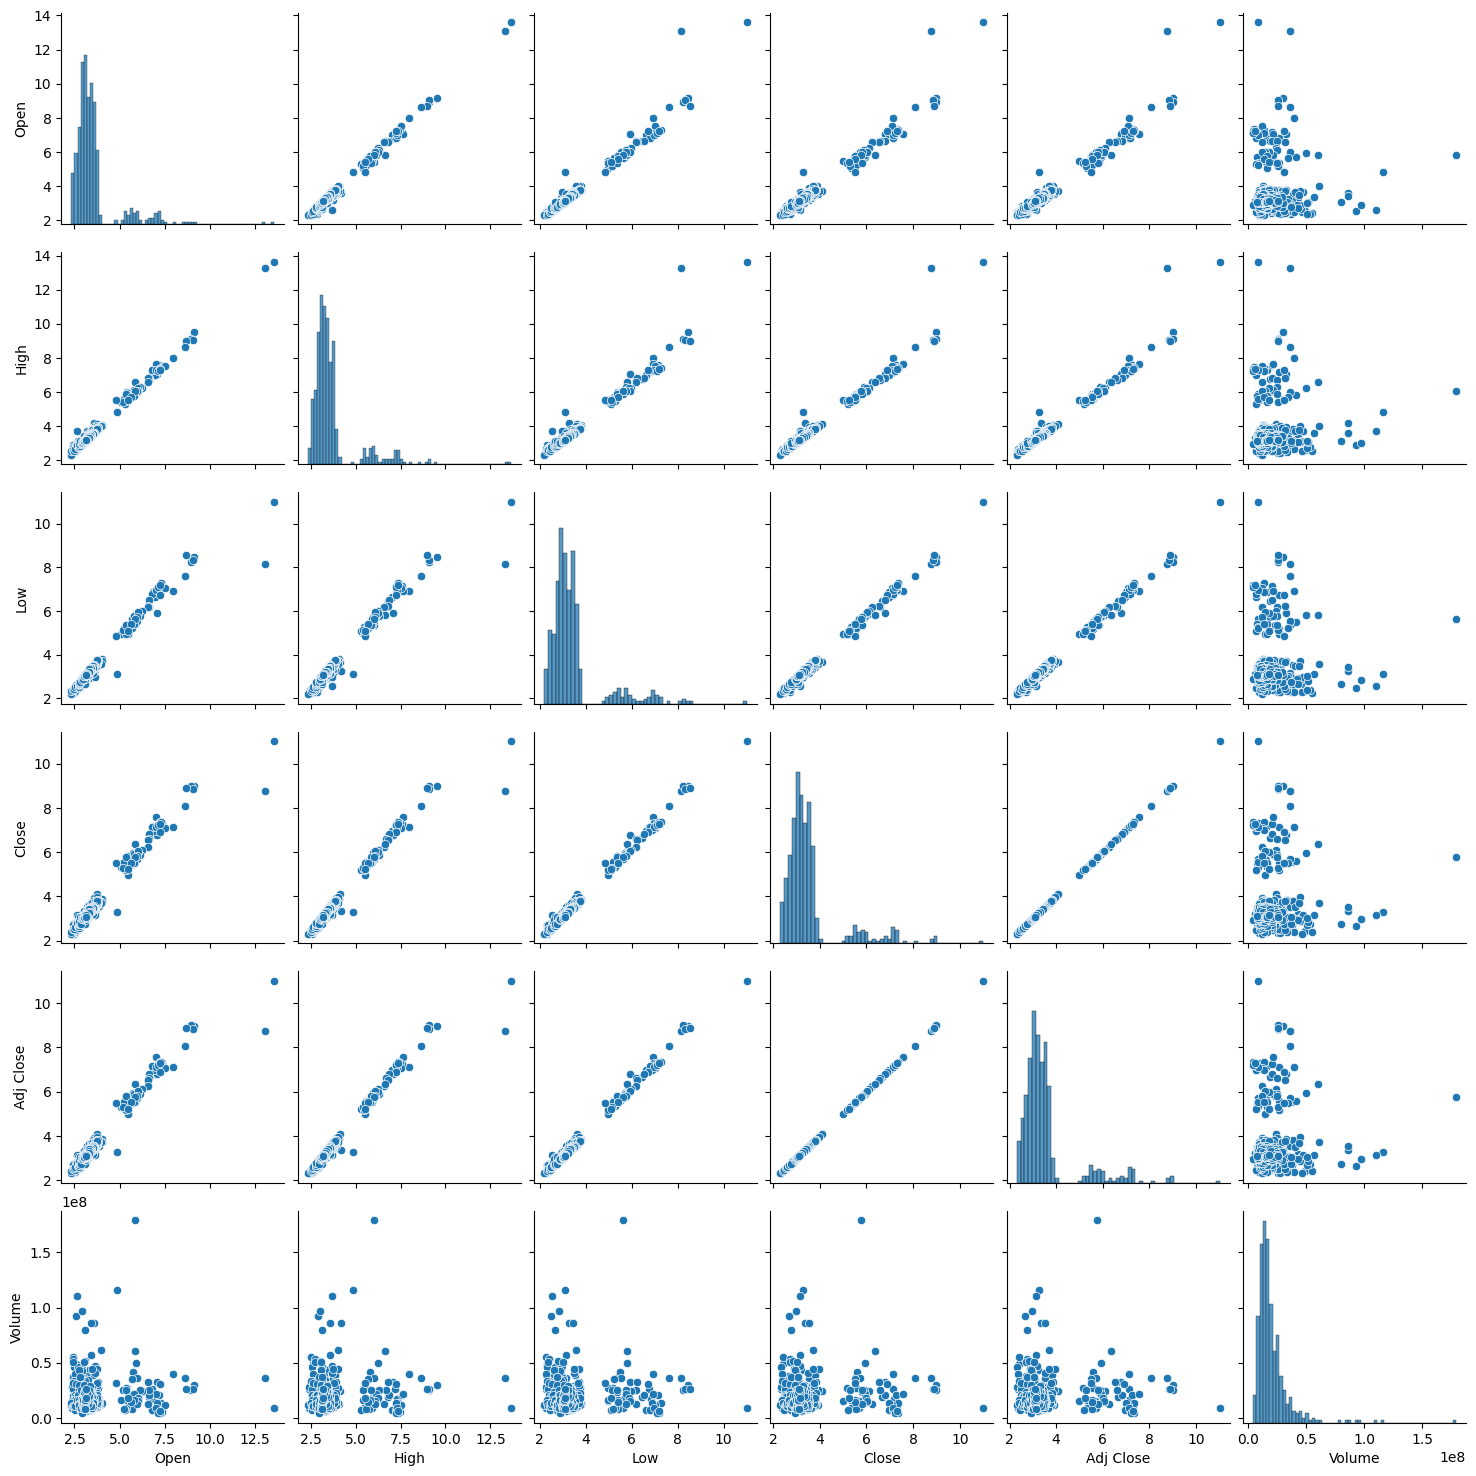

In [ ]:
#buat plot hubungan antar data
sns.pairplot(df)
plt.show()

In [ ]:
#hitung korelasi antar data dan buat matriks
corr_matrix = df.select_dtypes(include='number').corr()
print("\nMatriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.996342  0.981232  0.979652   0.979652  0.055962
High       0.996342  1.000000  0.981485  0.984290   0.984290  0.081956
Low        0.981232  0.981485  1.000000  0.996542   0.996542  0.016236
Close      0.979652  0.984290  0.996542  1.000000   1.000000  0.039761
Adj Close  0.979652  0.984290  0.996542  1.000000   1.000000  0.039761
Volume     0.055962  0.081956  0.016236  0.039761   0.039761  1.000000


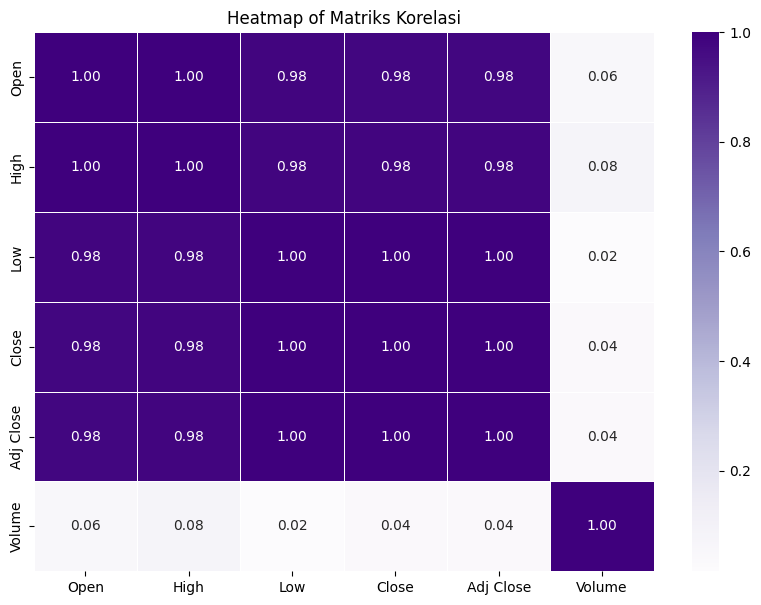

In [ ]:
# Buat Heatmap dari Matriks Korelasi
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Matriks Korelasi')
plt.show()

### Analisa Diagnostik untuk Deteksi Outlier antarkolom Dataset

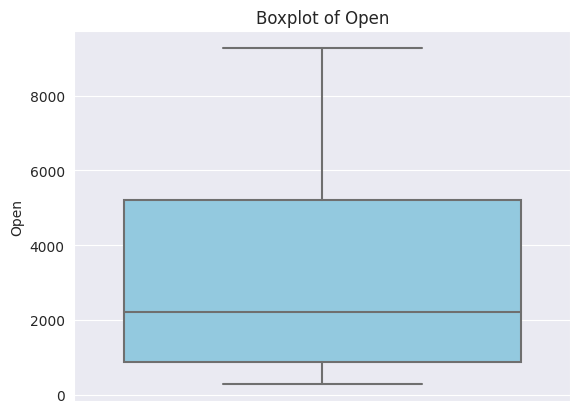

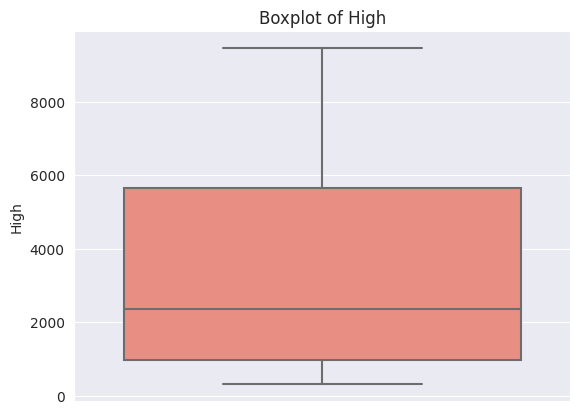

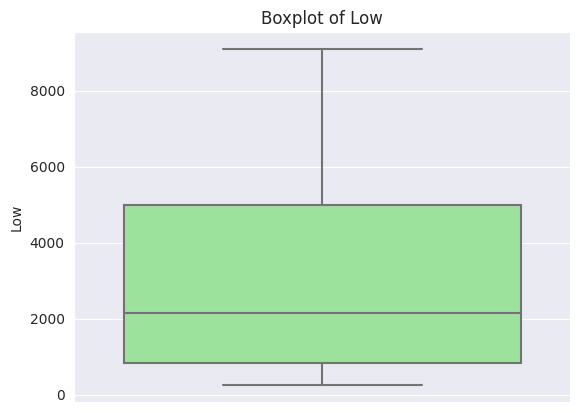

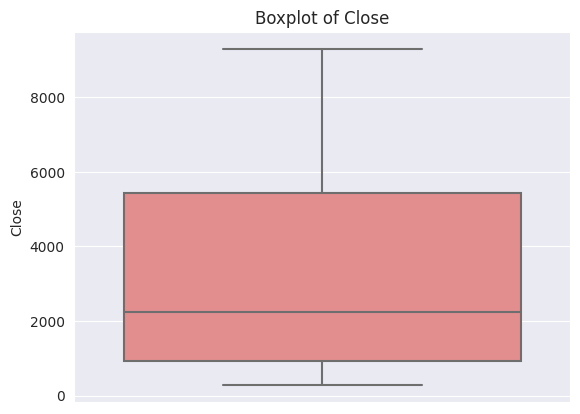

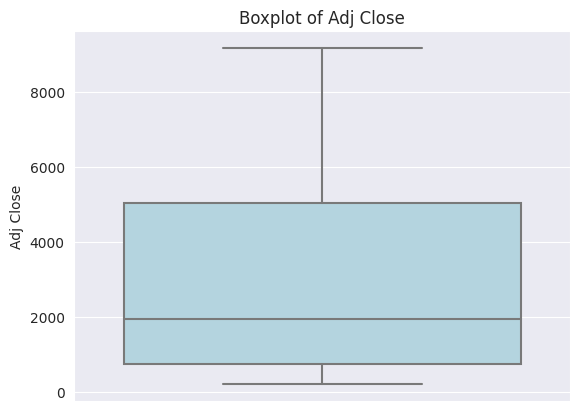

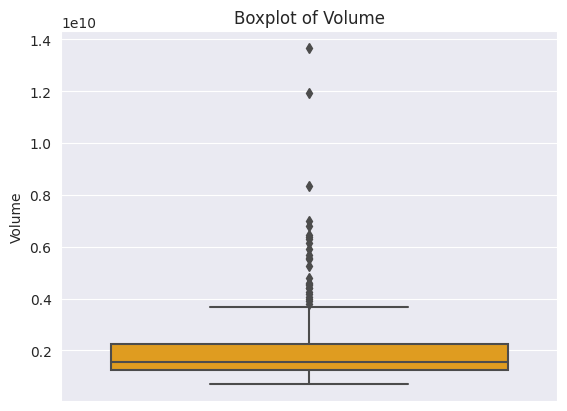

In [ ]:
sns.boxplot(y="Open", data=df, color="skyblue")
plt.title('Boxplot of Open')
plt.show()

sns.boxplot(y="High", data=df, color="salmon")
plt.title('Boxplot of High')
plt.show()

sns.boxplot(y="Low", data=df, color="lightgreen")
plt.title('Boxplot of Low')
plt.show()

sns.boxplot(y="Close", data=df, color="lightcoral")
plt.title('Boxplot of Close')
plt.show()

sns.boxplot(y="Adj Close", data=df, color="lightblue")
plt.title('Boxplot of Adj Close')
plt.show()

sns.boxplot(y="Volume", data=df, color="orange")
plt.title('Boxplot of Volume')
plt.show()

### Analisa Diagnostik untuk Deteksi Pattern dari Dataset

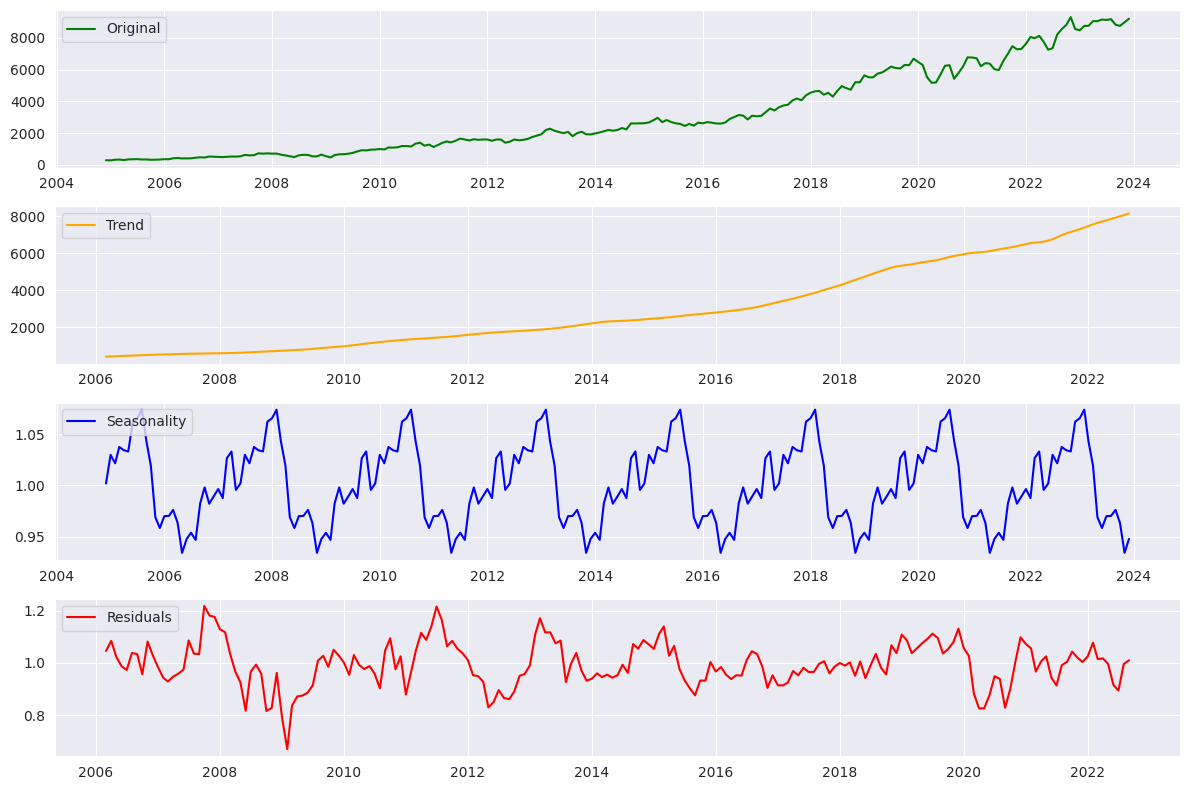

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Memilih kolom 'Close' untuk analisis tren waktu
close_price = df['Close']

# Dekomposisi Time Series
result = seasonal_decompose(close_price, model='multiplicative', period=30)  # Ganti period sesuai dengan kebutuhan

# Plot hasil dekomposisi dengan penambahan warna
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(close_price, label='Original', color='green')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## Dataset Visualization

### High and Low

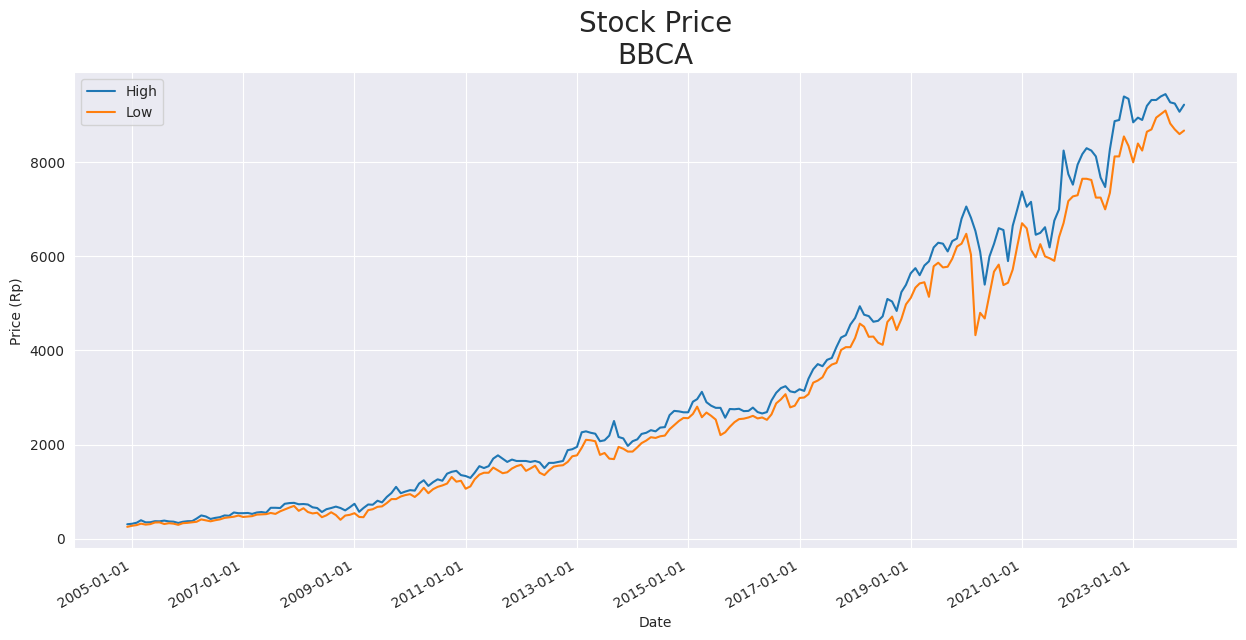

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))
x_dates = df.index.values

plt.plot(x_dates, df['High'], label='High')
plt.plot(x_dates, df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Stock Price\nBBCA", fontsize=20)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

### Open and Close

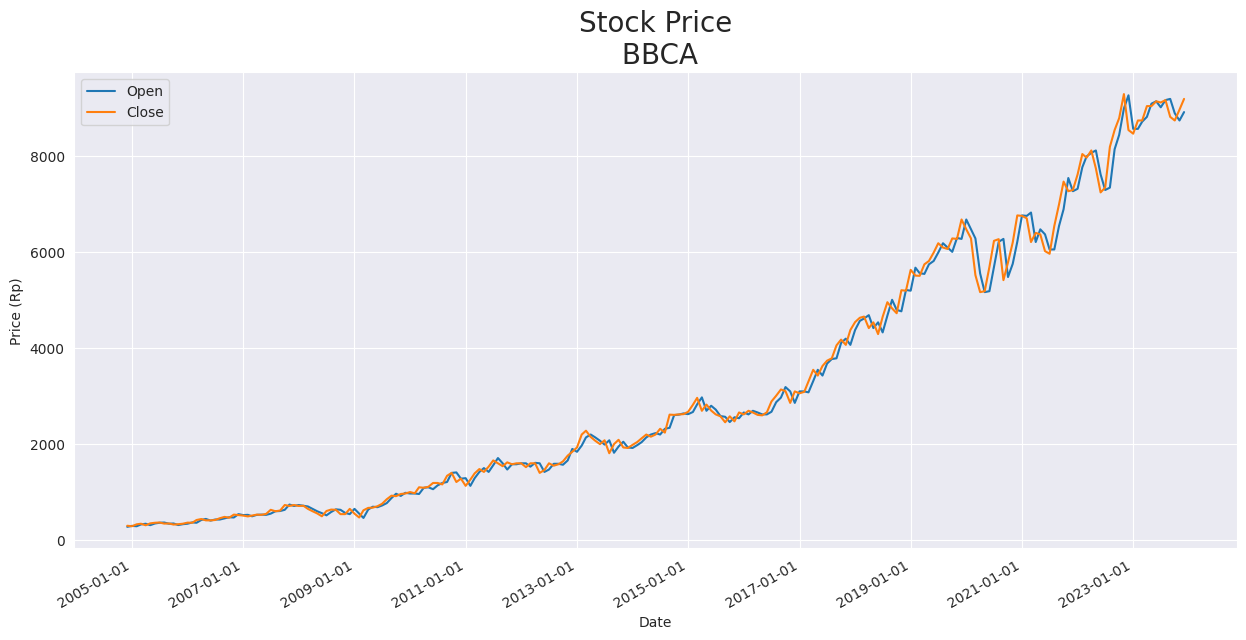

In [ ]:
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))

plt.plot(x_dates, df['Open'], label='Open')
plt.plot(x_dates, df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Stock Price\n BBCA", fontsize=20)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Close and Adj Close

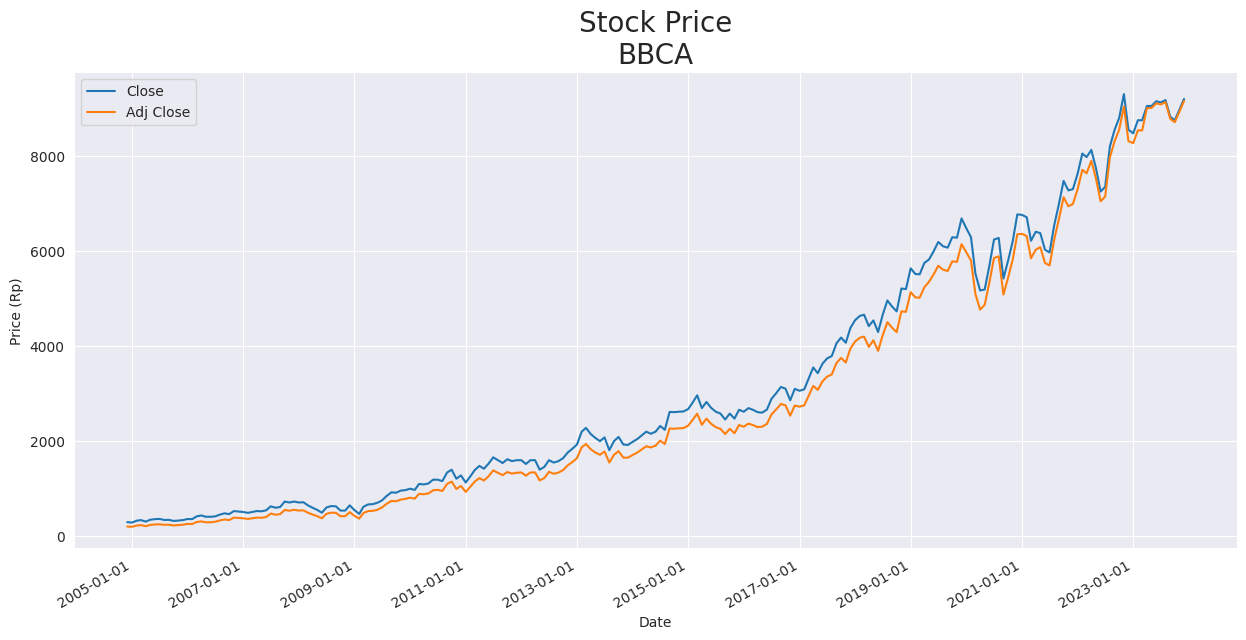

In [ ]:
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))

plt.plot(x_dates, df['Close'], label='Close')
plt.plot(x_dates, df['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Stock Price\nBBCA", fontsize=20)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

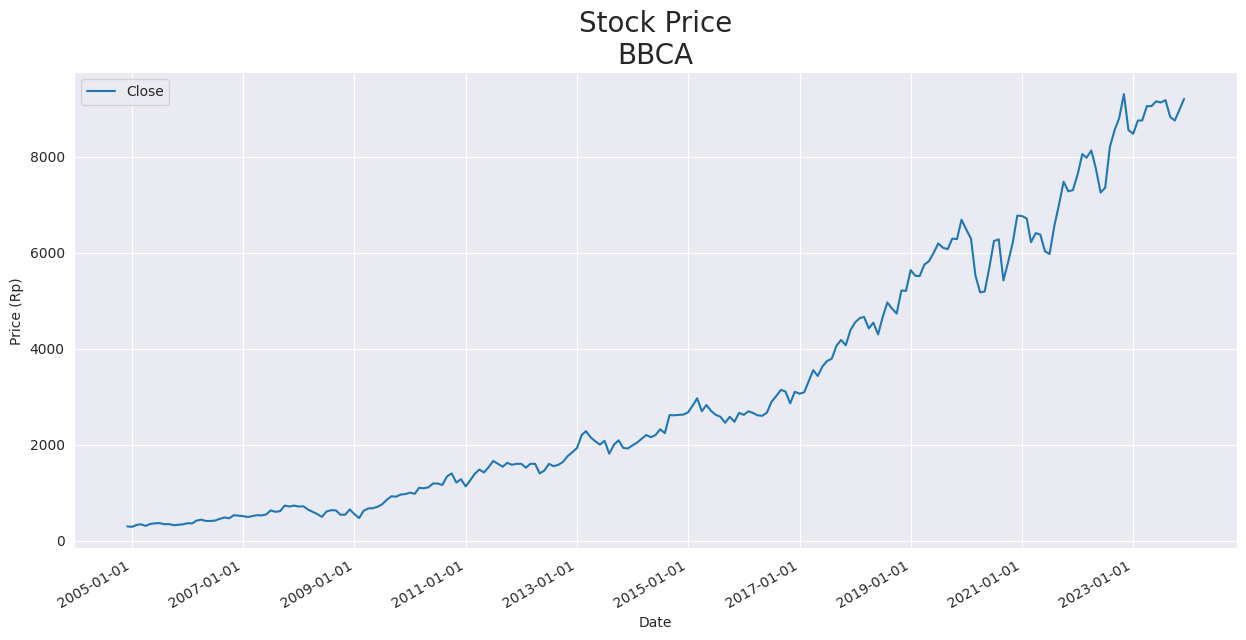

In [ ]:
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=24))

plt.plot(x_dates, df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Stock Price\nBBCA", fontsize=20)
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

## Data Preprocessing

### Feature Scaling

In [ ]:
#MinMaxScaler
ms = MinMaxScaler()
df['Close_ms'] = ms.fit_transform(df[['Close']])

### Split Data

In [ ]:
def split_data(df, train_size):
  size = int(len(df) * train_size)
  train, test = df.iloc[0:size], df.iloc[size:len(df)]
  return train, test

In [ ]:
train, test = split_data(df['Close_ms'], 0.8) #80% Train

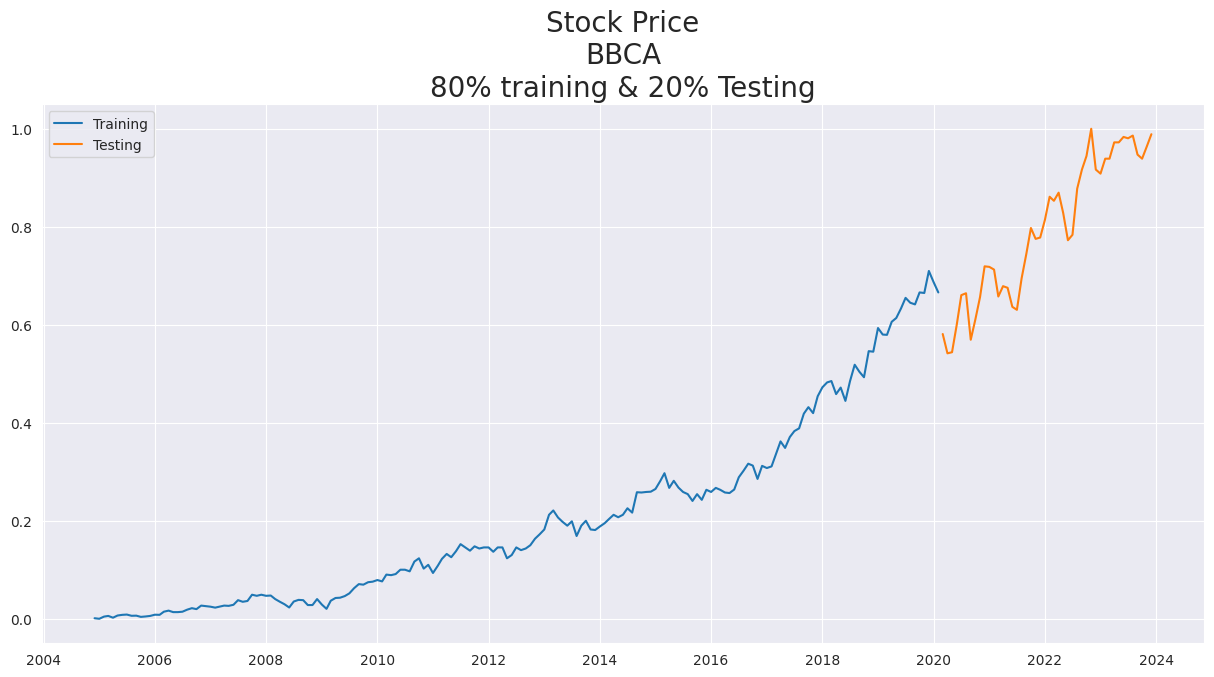

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Testing'])
plt.title('Stock Price\nBBCA\n80% training & 20% Testing', fontsize=20)
plt.show()

In [ ]:
def split_target(df, look_back=1):
    X, y = [], []
    for i in range(len(df) - look_back):
        a = df[i:(i + look_back), 0]
        X.append(a)
        y.append(df[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

## Build Model

In [ ]:
# Callbacks
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.01:
      self.model.stop_training = True

In [ ]:
model = Sequential([LSTM(128, input_shape=(1, 1), return_sequences=True),
                    Dropout(0.2),
                    LSTM(64),
                    Dropout(0.2),
                    Dense(32, activation='relu'),
                    Dense(1)])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            66560     
                                                                 
 dropout_2 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118081 (461.25 KB)
Trainable params: 118

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              metrics=["mae"],
              loss=tf.keras.losses.Huber())

## Training

In [ ]:
# Contoh kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model setelah kompilasi
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    shuffle=False,
                    callbacks=[Callback()])

Epoch 1/200
6/6 [==============================] - 6s 207ms/step - loss: 0.0644 - val_loss: 0.5702
Epoch 2/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0491 - val_loss: 0.4916
Epoch 3/200
6/6 [==============================] - 0s 27ms/step - loss: 0.0369 - val_loss: 0.4103
Epoch 4/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0282 - val_loss: 0.3316
Epoch 5/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0242 - val_loss: 0.2640
Epoch 6/200
6/6 [==============================] - 0s 24ms/step - loss: 0.0237 - val_loss: 0.2142
Epoch 7/200
6/6 [==============================] - 0s 23ms/step - loss: 0.0246 - val_loss: 0.1835
Epoch 8/200
6/6 [==============================] - 0s 22ms/step - loss: 0.0242 - val_loss: 0.1664
Epoch 9/200
6/6 [==============================] - 0s 25ms/step - loss: 0.0228 - val_loss: 0.1562
Epoch 10/200
6/6 [==============================] - 0s 25ms/step - loss: 0.0212 - val_loss: 0.1464
Epoch 11/200
6/6 [

Mean Absolute Error not found in history.


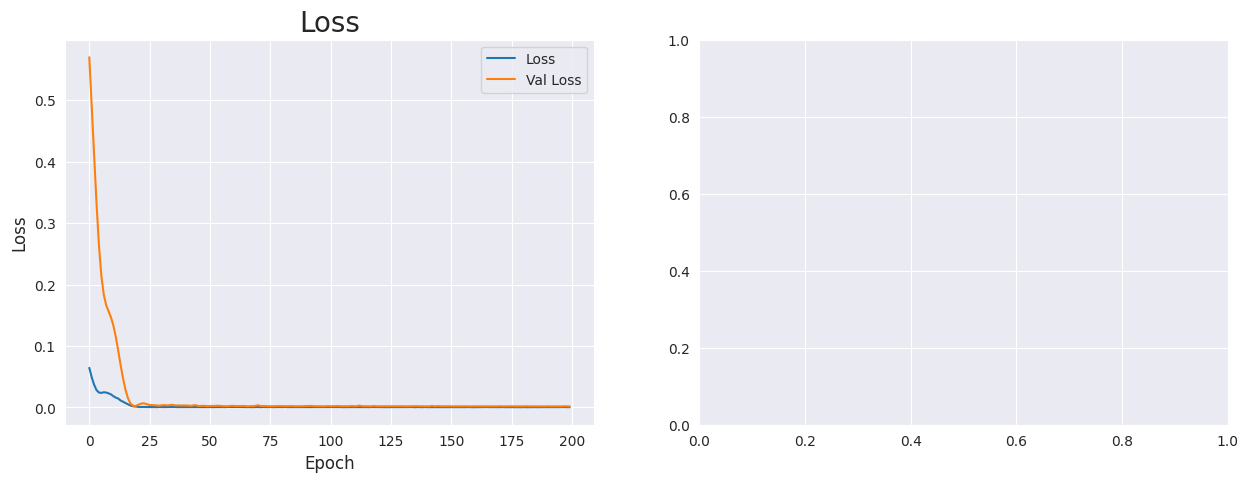

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss', 'Val Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MAE
if 'mean_absolute_error' in history.history:
    ax2.plot(history.history['mean_absolute_error'])  # Menggunakan kunci 'mean_absolute_error' untuk MAE
    ax2.plot(history.history['val_mean_absolute_error'])  # Kunci 'val_mean_absolute_error' untuk val MAE
    ax2.legend(['MAE', 'Val MAE'])
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Mean Absolute Error', fontsize=12)
    ax2.set_title('Mean Absolute Error', fontsize=20)
else:
    print("Mean Absolute Error not found in history.")
plt.show()


## Predict

2/2 [==============================] - 1s 7ms/step


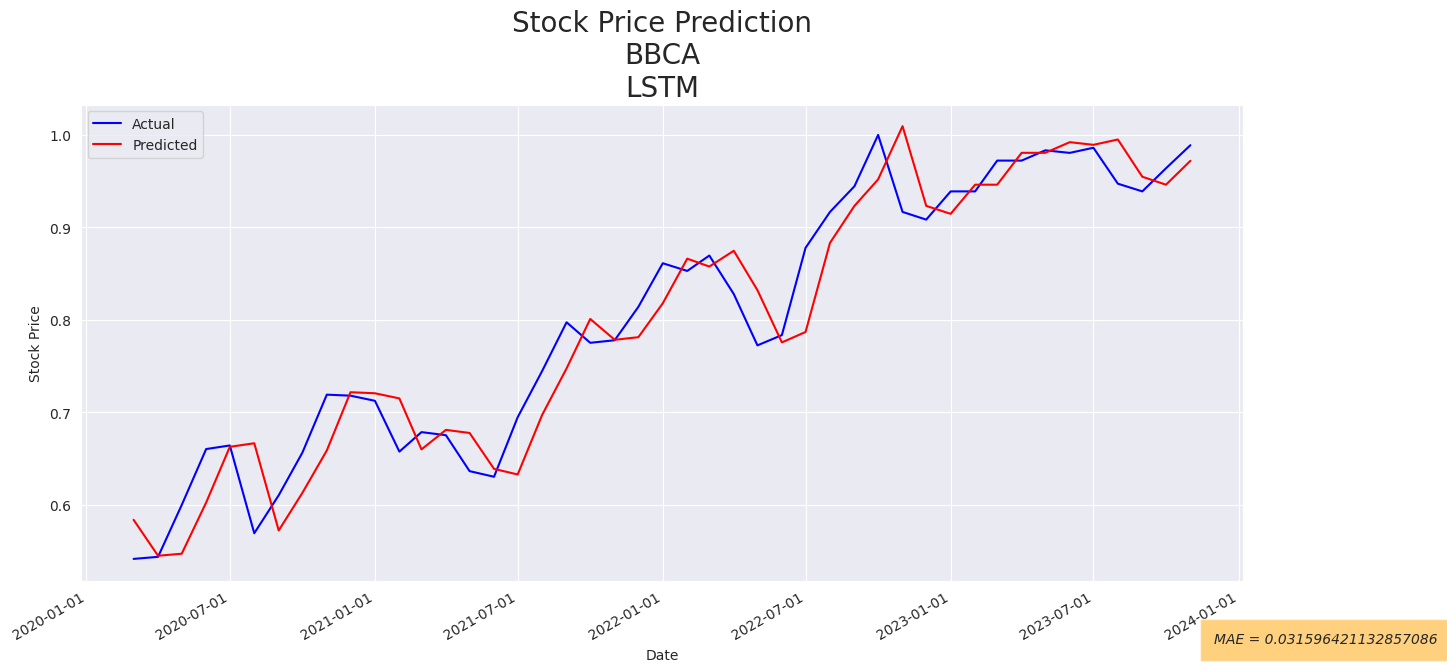

In [ ]:
# Perform prediction on the test data
pred = model.predict(X_test)
y_pred = np.array(pred).reshape(-1)

# Plot the actual and predicted prices
plt.figure(figsize=(15, 7))
plt.plot(test.index[:-1], y_test, color='blue', label='Actual')  # Exclude the last element to match the length
plt.plot(test.index[:-1], y_pred, color='red', label='Predicted')  # Exclude the last element to match the length

# Calculate MAE
mae_value = mean_absolute_error(y_test, y_pred)

# Choose a valid index within the range of your data
valid_index = min(300, len(test.index) - 1)

# Display MAE at the chosen index
plt.text(test.index[valid_index], 0.45, f"MAE = {mae_value}", style='italic', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction\nBBCA\nLSTM', fontsize=20)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

## Evaluation

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAE: ', mae)
print('RSME: ', rmse)
print('MAPE: ', mape)

MAE:  0.031596421132857086
RSME:  0.040501436803932166
MAPE:  0.04198791694158441


## Plot Semua Data dengan Hasil Prediksi

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


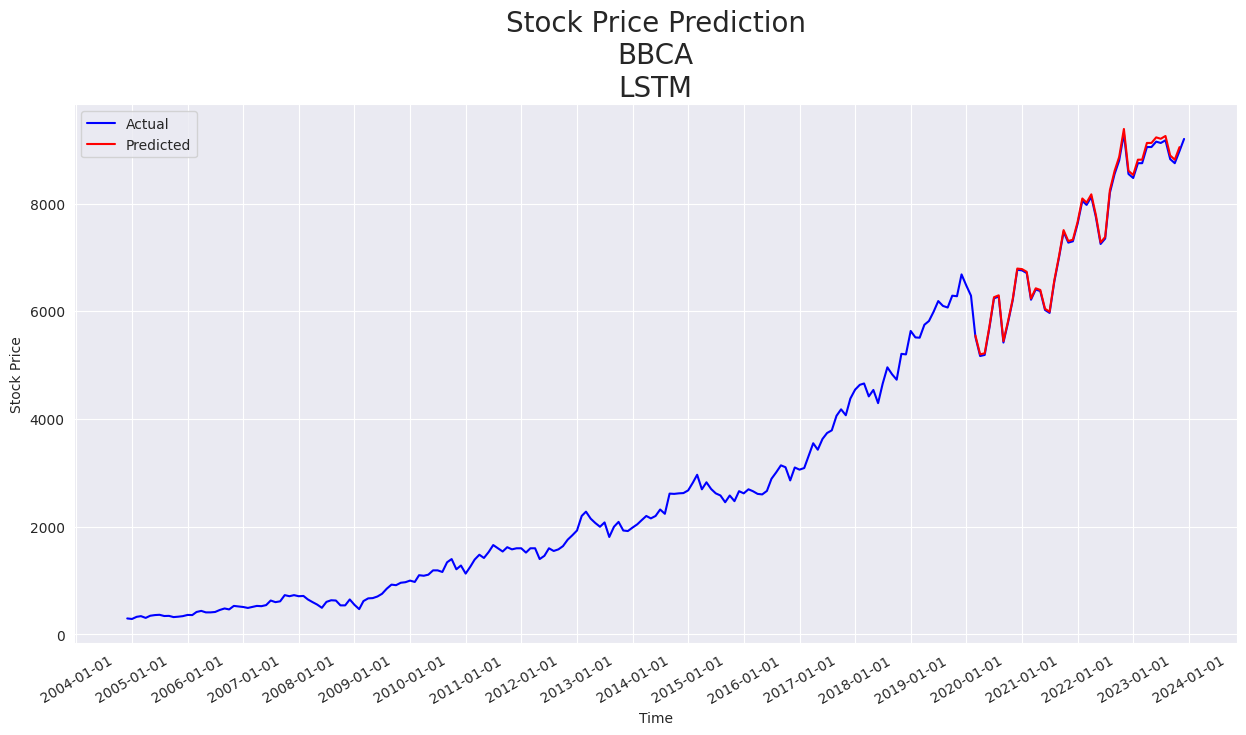

In [ ]:
# Inverse transform the predicted values
y_pred_original = ms.inverse_transform(np.array(y_pred).reshape(-1, 1))

# Plot the actual and predicted prices
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], color='blue', label='Actual')
plt.plot(df.index[:-1], [None] * len(train.index) + list(y_pred_original), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction\nBBCA\nLSTM', fontsize=20)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# Rotate x-axis labels
plt.xticks(rotation=30)

plt.legend()
plt.show()